In [1]:
from utils import *
from datasets import PascalVOCDataset
from tqdm import tqdm
from pprint import PrettyPrinter

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
# Good formatting when printing the APs for each class and mAP
pp = PrettyPrinter()

# Parameters
data_folder = './JSON'
keep_difficult = True  # difficult ground truth objects must always be considered in mAP calculation, because these objects DO exist!
batch_size = 8
workers = 4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoint = './Checkpoint/checkpoint_ssd300_wo_exemplar.pth.tar'

# Load model checkpoint that is to be evaluated
checkpoint = torch.load(checkpoint)
model = checkpoint['model']
model = model.to(device)

# Switch to eval mode
model.eval()

# Load test data
test_dataset = PascalVOCDataset(data_folder,
                                split='test',
                                year='2007',
                                keep_difficult=keep_difficult)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False,
                                          collate_fn=test_dataset.collate_fn, num_workers=workers, pin_memory=True)

In [4]:
images, boxes, labels, difficulties = next(iter(test_loader))

In [13]:
img = images[0].permute(1, 2, 0)

In [14]:
img = (img-img.min())/(img.max()-img.min())

In [9]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [30]:
img1 = images[1].permute(1, 2, 0)

In [32]:
img1 = (img1-img1.min())/(img1.max()-img1.min())

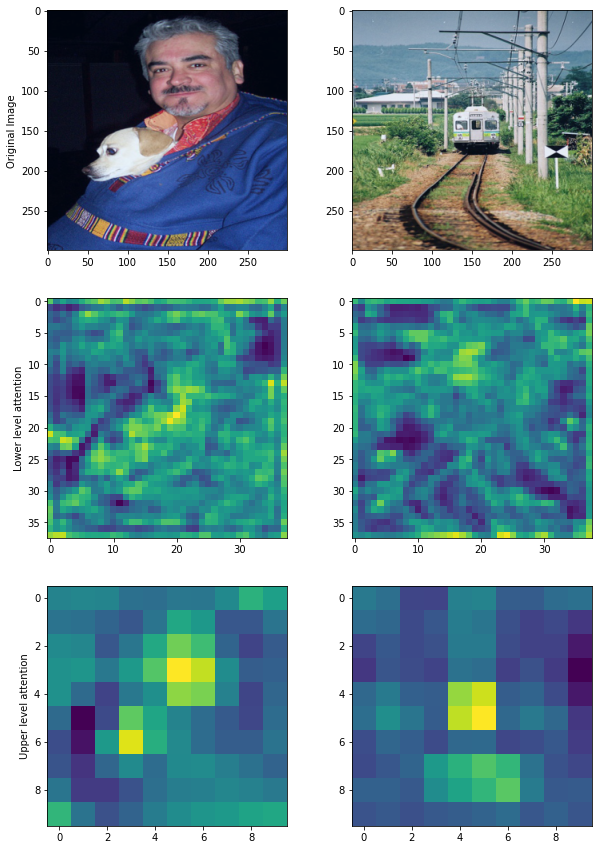

In [42]:
fig = plt.figure(figsize=(10,15))
ax1 = fig.add_subplot(3,2,1)
ax4 = fig.add_subplot(3,2,2)
ax2 = fig.add_subplot(3,2,3)
ax5 = fig.add_subplot(3,2,4)
ax3 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
ax1.imshow(img.detach().cpu().numpy())
ax1.set_ylabel('Original Image')
att4_3 = torch.sum(feature_maps[0][0], 0)
ax2.imshow(att4_3.detach().cpu().numpy())
ax2.set_ylabel('Lower level attention')
att8 = torch.sum(feature_maps[2][0], 0)
ax3.imshow(att8.detach().cpu().numpy())
ax3.set_ylabel('Upper level attention')
ax4.imshow(img1.detach().cpu().numpy())
att4_3 = torch.sum(feature_maps[0][1], 0)
ax5.imshow(att4_3.detach().cpu().numpy())

att8 = torch.sum(feature_maps[2][1], 0)
ax6.imshow(att8.detach().cpu().numpy())
plt.savefig('Attention_map.png')